In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_social_media_vs_productivity = pd.read_csv("social_media_vs_productivity.csv")

In [3]:
df_social_media_vs_productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [4]:
df_social_media_vs_productivity.shape

(30000, 19)

In [5]:
df_social_media_vs_productivity.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


In [6]:
df_social_media_vs_productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [7]:
df_clean = df_social_media_vs_productivity.dropna(subset = ['daily_social_media_time', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level','sleep_hours', 
                                                            'screen_time_before_sleep', 'job_satisfaction_score'])

# Limpiamos el dataset, eliminando las filas que tengan un NaN

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17074 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             17074 non-null  int64  
 1   gender                          17074 non-null  object 
 2   job_type                        17074 non-null  object 
 3   daily_social_media_time         17074 non-null  float64
 4   social_platform_preference      17074 non-null  object 
 5   number_of_notifications         17074 non-null  int64  
 6   work_hours_per_day              17074 non-null  float64
 7   perceived_productivity_score    17074 non-null  float64
 8   actual_productivity_score       17074 non-null  float64
 9   stress_level                    17074 non-null  float64
 10  sleep_hours                     17074 non-null  float64
 11  screen_time_before_sleep        17074 non-null  float64
 12  breaks_during_work              17074

In [39]:
df_clean.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000
mean,41.462926,3.122575,59.974288,6.989841,5.505523,4.944530,5.512592,6.506391,1.025165,5.001113,2.004803,15.540119,10.369978,4.945884
std,13.835084,2.080257,7.788587,1.995280,2.026415,1.888881,2.866152,1.455486,0.654821,3.183056,1.409725,9.240403,7.253499,2.130109
min,18.000000,0.000000,32.000000,0.000000,2.000252,0.298476,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.647730,55.000000,5.661512,3.745743,3.352817,3.000000,5.503544,0.526338,2.000000,1.000000,8.000000,4.605728,3.319909
50%,41.000000,3.036425,60.000000,6.985661,5.515816,4.936777,6.000000,6.510388,1.010674,5.000000,2.000000,16.000000,10.010172,4.941100
75%,53.000000,4.367746,65.000000,8.347780,7.259461,6.531210,8.000000,7.492182,1.473942,8.000000,3.000000,24.000000,15.306980,6.584756
max,65.000000,17.817948,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,9.000000,31.000000,40.964769,10.000000


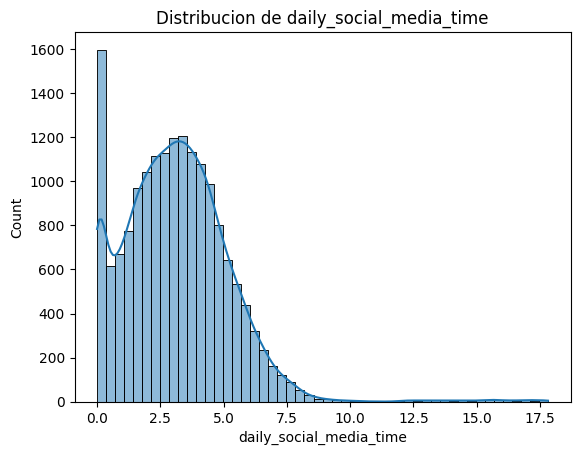

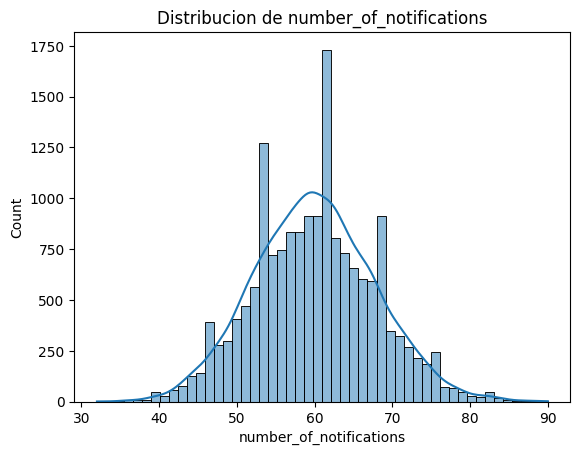

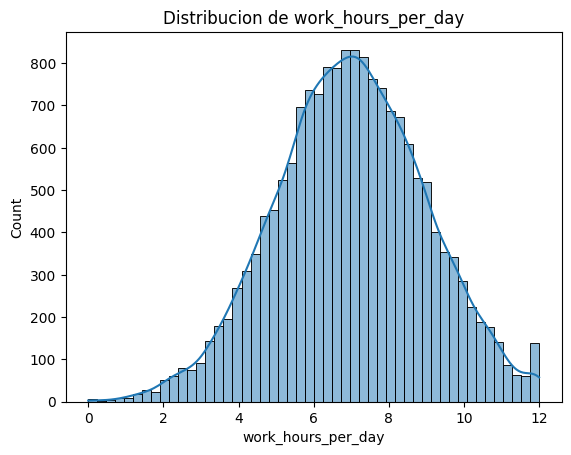

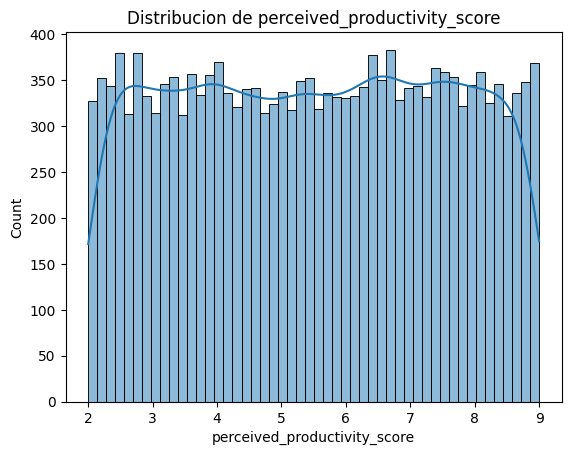

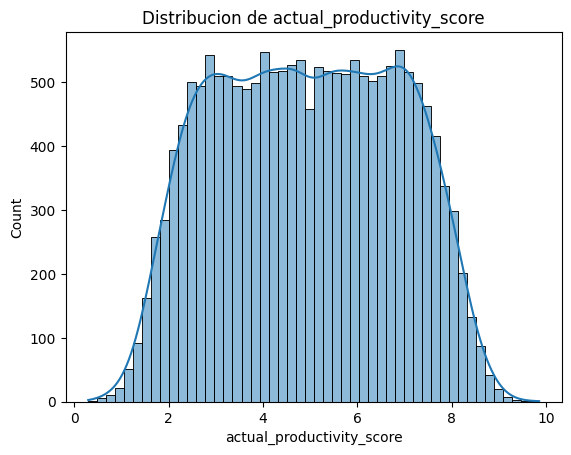

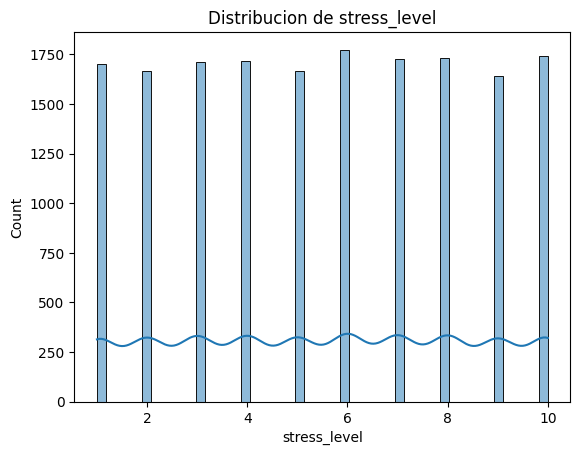

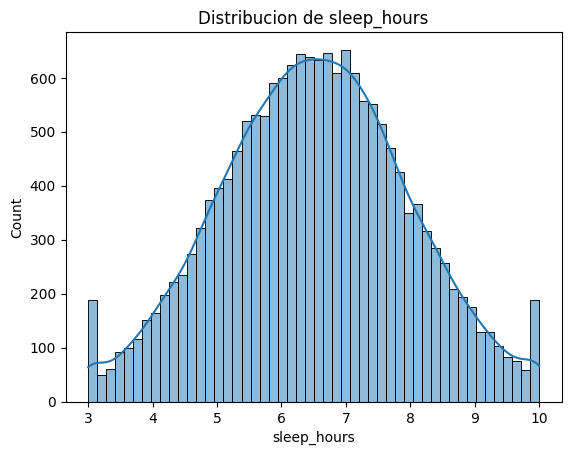

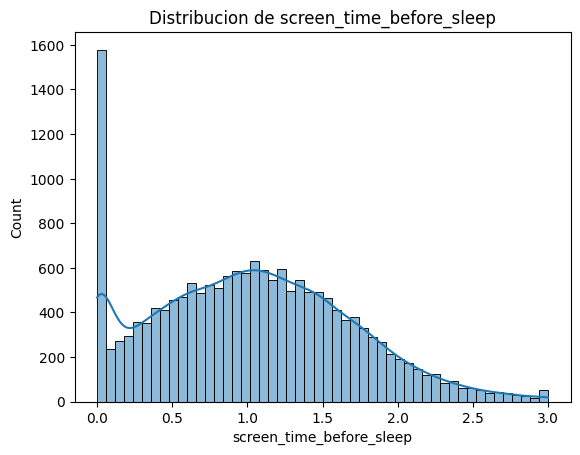

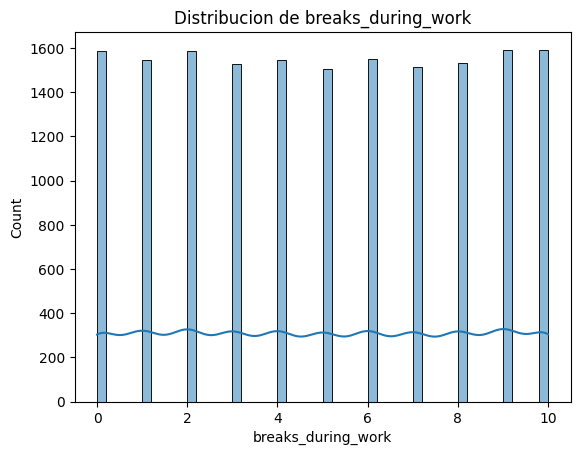

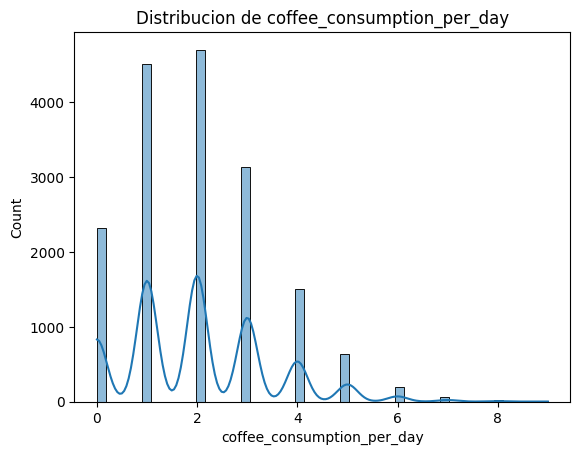

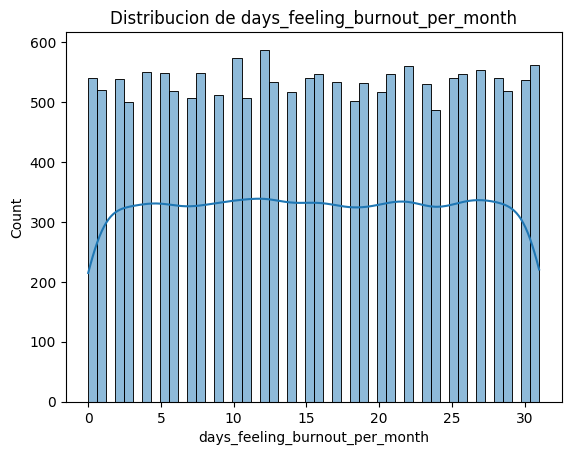

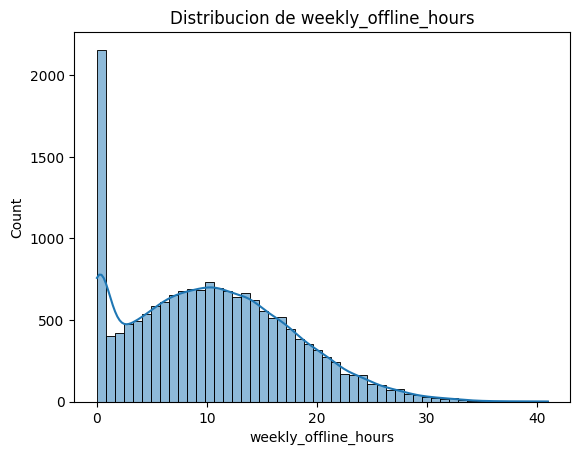

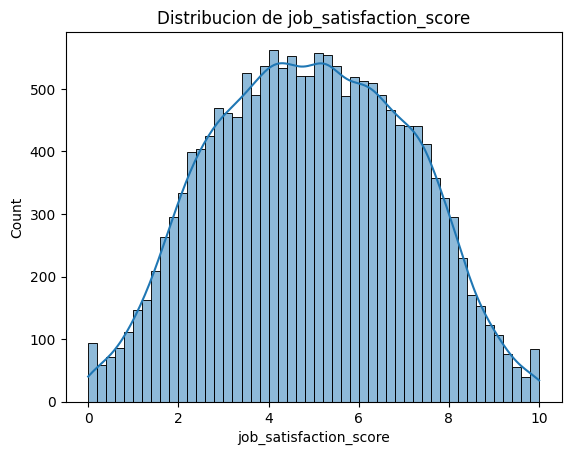

In [9]:
num_col= ['daily_social_media_time','number_of_notifications','work_hours_per_day','perceived_productivity_score','actual_productivity_score','stress_level',
          'sleep_hours','screen_time_before_sleep','breaks_during_work','coffee_consumption_per_day','days_feeling_burnout_per_month','weekly_offline_hours','job_satisfaction_score']

for col in num_col:
    sns.histplot(df_clean[col], kde= True, bins=50)
    plt.title(f'Distribucion de {col}')
    plt.xlabel(col)
    plt.show()


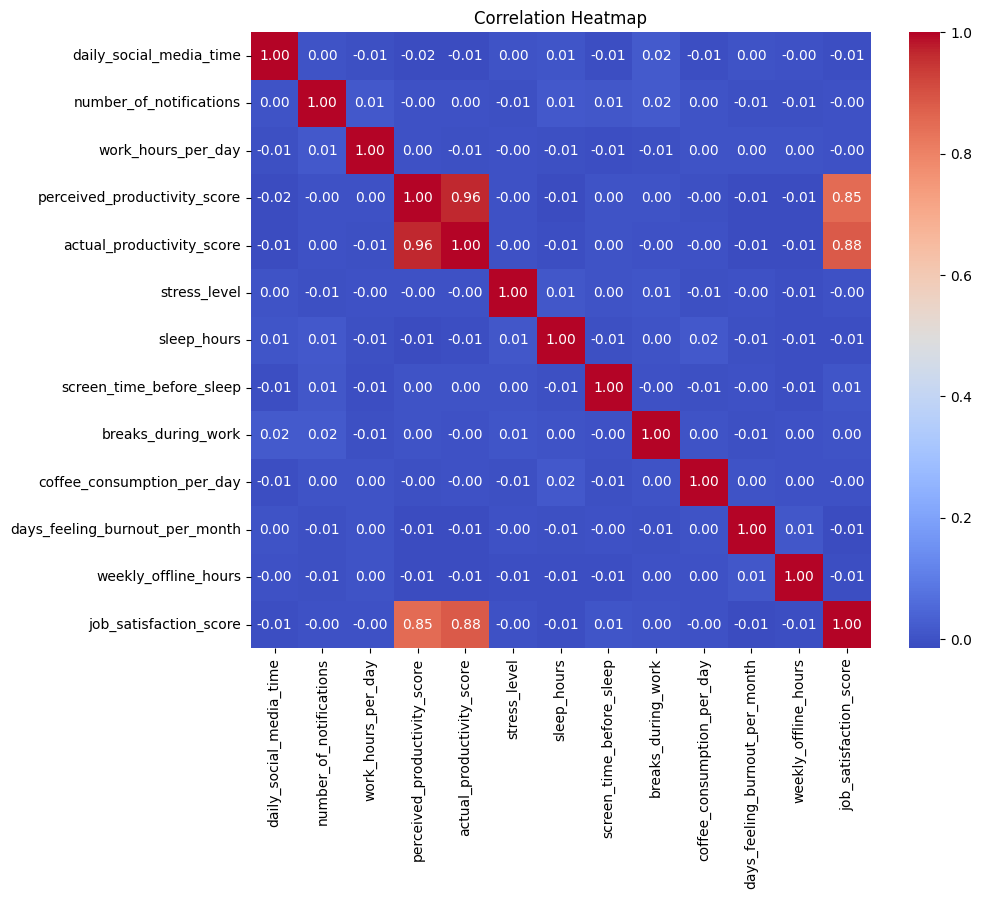

In [30]:
plt.figure(figsize=(10, 8))
corr = df_clean[num_col].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17074 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             17074 non-null  int64  
 1   gender                          17074 non-null  object 
 2   job_type                        17074 non-null  object 
 3   daily_social_media_time         17074 non-null  float64
 4   social_platform_preference      17074 non-null  object 
 5   number_of_notifications         17074 non-null  int64  
 6   work_hours_per_day              17074 non-null  float64
 7   perceived_productivity_score    17074 non-null  float64
 8   actual_productivity_score       17074 non-null  float64
 9   stress_level                    17074 non-null  float64
 10  sleep_hours                     17074 non-null  float64
 11  screen_time_before_sleep        17074 non-null  float64
 12  breaks_during_work              17074

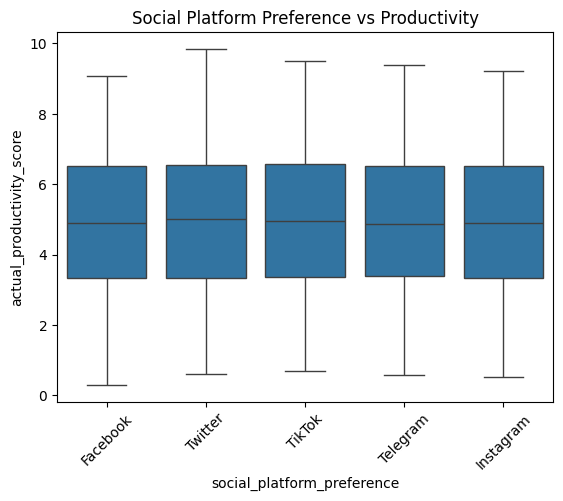

In [38]:
sns.boxplot(data=df_clean, x='social_platform_preference', y='actual_productivity_score')
plt.title('Social Platform Preference vs Productivity')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Crear los bins de 0 a 10
bins = [i for i in range(11)]  # [0, 1, 2, ..., 10]

# Crear etiquetas de texto
labels = [f'{i}-{i+1}' for i in range(10)]  # ['0-1', '1-2', ..., '9-10']

# Aplicar el corte categórico
df_clean['actual_productivity_cat'] = pd.cut(df_clean['actual_productivity_score'], bins=bins, labels=labels, right=False)

# Mostrar el resultado
df_clean


C:\Users\yanju\AppData\Local\Temp\ipykernel_11668\4209433696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['actual_productivity_cat'] = pd.cut(df_clean['actual_productivity_score'], bins=bins, labels=labels, right=False)


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,actual_productivity_cat
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688,7-8
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427,5-6
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373,5-6
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376,2-3
10,28,Male,IT,3.341559,Twitter,57,11.022035,8.940636,7.983252,4.0,3.952547,1.028640,5,True,True,1,3,13.514515,9.414637,7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,34,Male,IT,3.562316,Twitter,59,7.685305,3.233504,2.932739,9.0,5.689819,2.333739,2,False,False,1,30,3.687407,2.123211,2-3
29992,44,Female,Unemployed,1.648825,TikTok,39,6.547262,5.900434,5.164050,9.0,8.803968,0.305591,9,True,False,2,1,24.743560,6.073588,5-6
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613,6-7
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237,8-9


<Figure size 1400x1000 with 0 Axes>

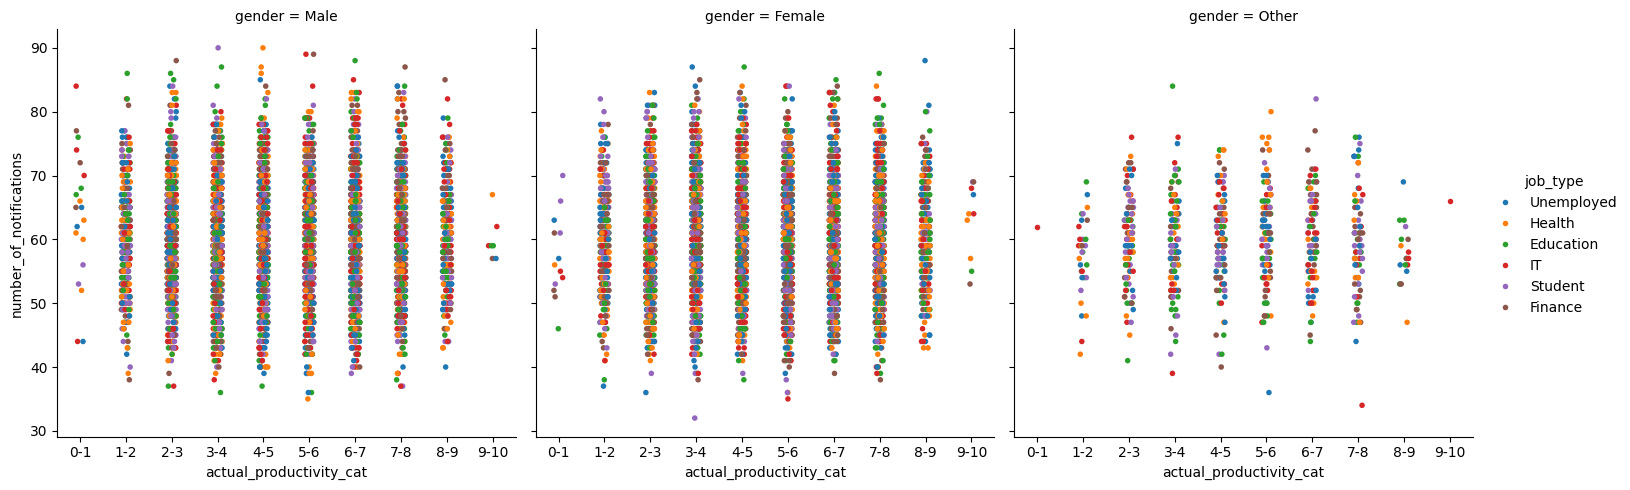

In [65]:
plt.figure(figsize=(14,10))
sns.catplot(df_clean,x='actual_productivity_cat',y='number_of_notifications',size=4,hue='job_type',col='gender')